# Exercise 04 Classification I

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [58]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Part 1. Logistic regression with a toy dataset

This part will buid a binary classifier using the logistic regression algorithm with a toy dataset.
The aim of this part is to master how to implement logistic regression using `sklearn` and how to calculate various evaluation metrics.

### Load dataset

In this part, we will use a toy dataset provided by `sklearn`: the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).

he breast cancer dataset is a classic and very easy binary classification dataset. You can find the original source of this dataset [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

There are 30 numeric features in the dataset that might be useful for diagnosing breast cancer. These features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

The features include:
- radius
- texture
- perimeter
- area
- smoothness
- compactness
- concavity
- concave points
- symmetry
- fractal dimension

Each example is corresponding to a digitized image with multiple cell nucleus. The above features of each cell nuclei are summarized as a mean value, a worst value and a standard variation.

There are two classes in this dataset: 1 (WDBC-Malignant) and 0 (WDBC-Benign).

Load this dataset using `sklearn.datasets.load_breast_cancer`, you can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

In [59]:
# load dataset
feature_df, target_df = datasets.load_breast_cancer(
    return_X_y = True,
    as_frame = True
)

In [60]:
# get the basic information of the features
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There are too many features in the dataset, some of them are highly correlated with each other. For example, the mean value and worst value might be highly correlated.

To simply the problem, we only keep the mean values as the input features and eliminate the worst values and standard deviations.

In [61]:
# keep the last 10 columns as the input features
feature_df = feature_df[feature_df.columns[:10]]
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean perimeter          569 non-null    float64
 3   mean area               569 non-null    float64
 4   mean smoothness         569 non-null    float64
 5   mean compactness        569 non-null    float64
 6   mean concavity          569 non-null    float64
 7   mean concave points     569 non-null    float64
 8   mean symmetry           569 non-null    float64
 9   mean fractal dimension  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


In [62]:
# print the target class
target_df

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [63]:
# check imbalanced classes
print("Number of negative class:", sum(target_df == 0))
print("Number of positive class:", sum(target_df == 1))

Number of negative class: 212
Number of positive class: 357


### Train test split

In [64]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

### Train the model

We will train a logistic regression model to perform binary classification.

Use `sklearn.linear_regression.LogisticRegression` to implement logistic regression.

Logistic regression model outputs the probability of an example belongs to a category. We need to specify a threshold to convert the predicted probabilities to discrete categories.

`sklearn.linear_regression.LogisticRegression` set the default threshold to 0.5

In [65]:
# fit the model
clf = LogisticRegression(max_iter = 10000) # Increase the number of iterations
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Evaluate the model

To evaluate the model performance on the testing dataset, we need to use the trained model to make predictions at first. There are two types of prediction can be made:
- method `predict_proba()` output the predicted probability
- method `predict()` output the predicted category by setting the threshold to 0.5

In [66]:
# predict probability for the first five examples in the testing dataset
clf.predict_proba(X_test[:5, :])

array([[0.54998852, 0.45001148],
       [0.19601579, 0.80398421],
       [0.06944117, 0.93055883],
       [0.13580807, 0.86419193],
       [0.03477599, 0.96522401]])

The output is a 2D array.
- The first column is the probability of being 0 (the negative class)
- The second column is the probability of being 1 (the positive class)
- The sum of each row is equal to 1

In [67]:
# predict the category for the first five examples in the testing dataset
clf.predict(X_test[:5, :])

array([0, 1, 1, 1, 1])

The output is a 1D array consists of predicted categories.
- 0 represent the negative class
- 1 represent the positive class
- The default threshold is 0.5

In [68]:
# make predictions for the entire testing dataset
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

#### Confusion matrix

Compute confusion matrix using `sklearn.metrics.confusion_matrix`.

Visualization confusion matrix using `sklearn.metrics.ConfusionMatrixDisplay`.

In [69]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  6]
 [ 9 99]]


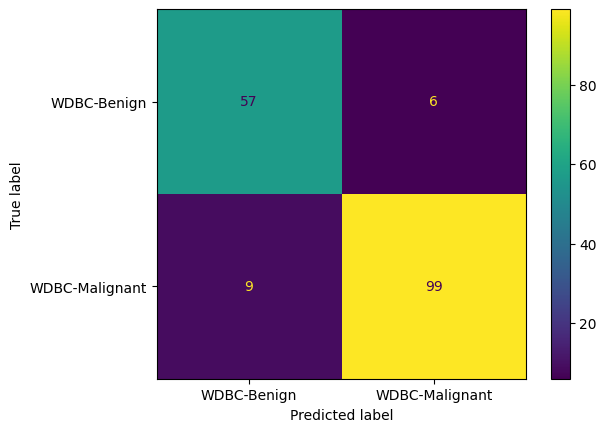

In [70]:
# visualize the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['WDBC-Benign', 'WDBC-Malignant']
)
disp.plot()
plt.show()

#### Accuracy, precision, recall & F1-score

We can calculate these metrics manually using the confusion matrix.

Or we can `sklearn` to automatically perform the calculation:
- `sklearn.metrics.accuracy_score`
- `sklearn.metrics.precision_score`
- `sklearn.metrics.recall_score`
- `sklearn.metrics.f1_score`

In [71]:
# calculate the metrics manually
accuracy_test = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision_test = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall_test = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_test = 2 * precision_test * recall_test / (precision_test + recall_test)

# print the metrics
print("Accuracy:\t", accuracy_test)
print("Precision:\t", precision_test)
print("Recall:\t\t", recall_test)
print("F1-score:\t", f1_test)

Accuracy:	 0.9122807017543859
Precision:	 0.9428571428571428
Recall:		 0.9166666666666666
F1-score:	 0.9295774647887323


In [72]:
# calcualte the metrics by sklearn
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("Precision:\t", precision_score(y_test, y_pred))
print("Recall:\t\t", recall_score(y_test, y_pred))
print("F1-score:\t", f1_score(y_test, y_pred))

Accuracy:	 0.9122807017543859
Precision:	 0.9428571428571428
Recall:		 0.9166666666666666
F1-score:	 0.9295774647887324


In [73]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.94      0.92      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



#### ROC curve & AUC

Use `sklearn.metrics.roc_curve` to compute the ROC curve.

Use `sklearn.metrics.roc_auc_score` to calculate the AUC metric.

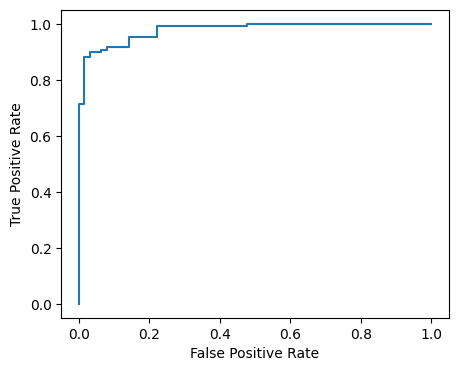

In [74]:
# compute ROC curve
fpr, tpr, thresholds = roc_curve(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# plot ROC curve
plt.figure(figsize = [5, 4])
plt.plot(fpr, tpr, '-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [75]:
# calculate AUC
auc_test = roc_auc_score(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
)
print("AUC:\t", auc_test)

AUC:	 0.9775132275132274


## Part 2. Hands-on exercise

In this exercise, we will build a logistic regression model with the the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), the same one as Exercise 02 & 03.

The goal of the logistic regression model is to perform a binary classification taks:
- 0 represent 'Normal Price'
- 1 represent 'Expensive Price'

Since there is no such categorical columns in the dataset, we need to create the target labels according to the `MedHouseVal`, which used to be the target variable for regression problem.
- `MedHouseVal` <= 2.5 $\rightarrow$ 'Normal Price'
- `MedHouseVal` > 2.5 $\rightarrow$ 'Expensive Price'

<span style="color:red">**[TBC]**</span> Please complete the following tasks:
- Load the California Housing Dataset
- Create target labels
- Split the dataset into the training and testing part
- Train the logistic regression model
- Evaluate the trained model with various metrics

### Task 1. Load the California Housing Dataset

<span style="color:red">**[TBC]**</span> It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing()` function.

In [76]:
# [TBC] complete your code here with proper comments
data = datasets.fetch_california_housing()
data_df = pd.DataFrame(data.data,columns=data.feature_names)
data_df['MedHouseVal'] = data.target
print(data_df.info())
data_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Task 2. Create the target labels

<span style="color:red">**[TBC]**</span> Use `MedHouseVal` as the reference to create a pandas series as the new targel variable.

In [ ]:
# Create the 'expensive_val' target variable
data_df['ExpensiveVal'] = (data_df['MedHouseVal'] > 2.5).astype(int)

# Display the first few rows to verify
print(data_df[['MedHouseVal', 'ExpensiveVal']].head())
    

   MedHouseVal  ExpensiveVal
0        4.526             1
1        3.585             1
2        3.521             1
3        3.413             1
4        3.422             1


### Task 3. Split the dataset into the training and testing part
<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and testing set. Please use 70% of the data as the training dataset, and the rest as the testing dataset.

In [78]:
# [TBC] complete your code here with proper comments
target_df = data_df['ExpensiveVal']
feature_df = data_df.drop(data_df[['MedHouseVal', 'ExpensiveVal']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # features
    target_df.values, # target
    train_size = 0.7, # 70% training & 30% test
    shuffle = True, 
    random_state = 0
)

type(X_train)

numpy.ndarray

### Task 4. Train the logistic regression model
<span style="color:red">**[TBC]**</span> Please use `sklearn.linear_regression.LogisticRegression` to implement logistic regression and train the binary classifier.

In [79]:
# [TBC] complete your code here with proper comments
clf = LogisticRegression(max_iter = 10000) # Increase the number of iterations
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Task 5. Evaluate the trained model with various metrics

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- make predictions for the testing dataset
- compute and visualize the confusion matrix
- calculate accuracy, precision, recall, and F1-score
- compute the ROC curve and AUC
- analysis the performance of this classifier

In [80]:
# [TBC] complete your code here with proper comments
clf.predict_proba(X_test[:5, :])

array([[0.79615888, 0.20384112],
       [0.41822657, 0.58177343],
       [0.93735708, 0.06264292],
       [0.99525099, 0.00474901],
       [0.21020114, 0.78979886]])

- First column is the probability of being 0 (the negative class, normal value house)
- Second column is the probability of being 1 (the positive class, expensive value house)
- The sum of each row is equal to 1

In [89]:
clf.predict(X_test[:5, :])

array([0, 1, 0, 0, 1])

- 0 represent the normal value house
- 1 represent the expensive value house
- The default threshold is 0.5

In [82]:
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [83]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4154  296]
 [ 539 1204]]


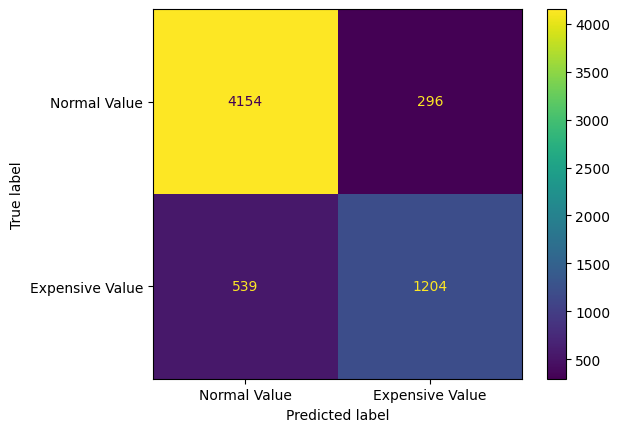

In [84]:
# visualize the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['Normal Value', 'Expensive Value']
)
disp.plot()
plt.show()

1. 4154 True Negative, Normal Value
2. 296 False Negative, Normal Value
3. 539 False Positive, Expensive Value
4. 1204 True Positive, Expensive Value

In [91]:
# calculate the metrics by sklearn
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("Precision:\t", precision_score(y_test, y_pred))
print("Recall:\t\t", recall_score(y_test, y_pred))
print("F1-score:\t", f1_score(y_test, y_pred))

Accuracy:	 0.8651703536250606
Precision:	 0.8026666666666666
Recall:		 0.6907630522088354
F1-score:	 0.7425223558433549


#### Accuracy -> 0.86
This means that 86% of the times the model will predict correctly, taking the risk of being mistaken 14% of the times. However, it can be misleading if there is class imbalance (e.g., many more normal houses than expensive ones).

#### Precision -> 0.80
High precision means low rate of fake alerts, meaning in this case that there is a 20% chance of houses getting a expensive_values tag when they are not (False Positive).

#### Recall -> 0.69
High recall means low rate of missing alerts, due to it measures how many of the actual positive cases (expensive houses) the model identifies correctly. The recall is 0.69, meaning 31% of expensive houses are missed and misclassified as normal..

#### F1-Score -> 0.74
The closer it is to 1 the better, being the harmonic mean between recall and precision. F1-score balances the trade-off between precision and recall, especially useful for imbalanced datasets, reflecting a more real performance than the accuracy.  In this case, an F1-score of 0.74 suggests a decent balance but room for improvement.

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4450
           1       0.80      0.69      0.74      1743

    accuracy                           0.87      6193
   macro avg       0.84      0.81      0.83      6193
weighted avg       0.86      0.87      0.86      6193



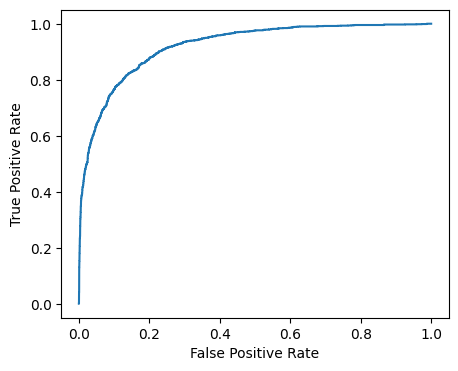

AUC:	 0.9207869680971075


In [88]:
fpr, tpr, thresholds = roc_curve(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# plot ROC curve
plt.figure(figsize = [5, 4])
plt.plot(fpr, tpr, '-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# calculate AUC
auc_test = roc_auc_score(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
)
print("AUC:\t", auc_test)

The area under the ROC curve of 0.92 means that the model acts like a good classifier, it learned and can predict better than a random one.